In [ ]:
from sRNA_module import SRNARegulator

from process_bigraph import register_types, ProcessTypes
import matplotlib.pyplot as plt


In [2]:
# Always create a core and pass it in
core = register_types(ProcessTypes())



In [3]:
# Choose 'activator' or 'repressor'
srna = SRNARegulator({'mode': 'activator'}, core=core)

In [4]:
# Initial state (you can edit these)
state = srna.initial_state()
state['cell'].update({'s': 0.0, 'm': 5.0, 'c': 0.0, 'P': 0.0, 'S': 0.0})

In [5]:
# Simulation settings
t, dt, T_end = 0.0, 0.05, 20.0

In [6]:
# Trajectories (lists!)
times = [t]
traj = {k: [state['cell'][k]] for k in ('S', 's', 'm', 'c', 'P')}

# Stress schedule: step from 0 to 1 at t = 5
while t < T_end:
    state['cell']['S'] = 0.0 if t < 5.0 else 1.0

    # Step the process
    delta = srna.update({'cell': state['cell']}, dt)
    for k in ('s', 'm', 'c', 'P'):
        state['cell'][k] += delta['cell'][k]

    # Record
    t += dt
    times.append(t)
    for k in ('S', 's', 'm', 'c', 'P'):
        traj[k].append(state['cell'][k])

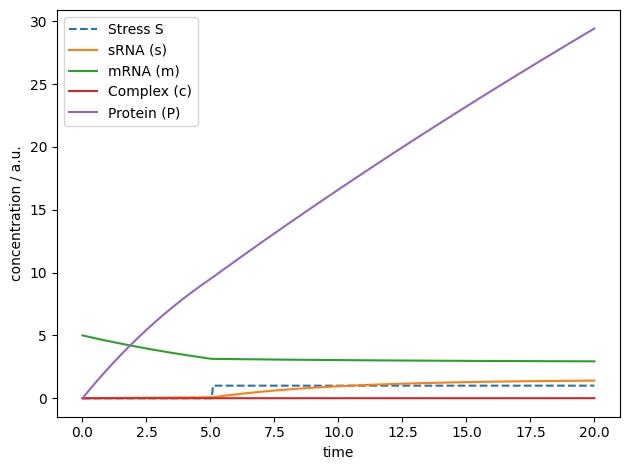

In [7]:
# ---------------------------- Plot ----------------------------
plt.figure()
plt.plot(times, traj['S'], linestyle='--', label='Stress S')
plt.plot(times, traj['s'], label='sRNA (s)')
plt.plot(times, traj['m'], label='mRNA (m)')
plt.plot(times, traj['c'], label='Complex (c)')
plt.plot(times, traj['P'], label='Protein (P)')
plt.xlabel('time'); plt.ylabel('concentration / a.u.')
plt.legend()
plt.tight_layout()
plt.show()